In [20]:
from qiskit import QuantumCircuit,Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

### Check Qiskit's computational basis

- Qiskit uses **LSB** ordering while PennyLane uses **MSB** ordering for qubits.
  - LSB: Least Significant Bit (rightmost bit)
  - MSB: Most Significant Bit (leftmost bit)
  
  ![image.png](./img/qiskit_ordering.png)

For example, for 3-qubit system, the basis states are ordered as follows:
  > - Qiskit: $|q_2 q_1 q_0\rangle$
  > - PennyLane: $|q_0 q_1 q_2\rangle$

In [2]:
def check_computational_basis(basis):
    n = int(np.log2(len(basis)))
    qc = QuantumCircuit(n,n)
    initial_state = np.array(basis) / np.linalg.norm(basis)
    qc.initialize(initial_state, reversed(range(n))) # Input : LSB -> MSB
    qc.measure(range(n), reversed(range(n)))         # Readout: LSB -> MSB
    backend = Aer.get_backend('qasm_simulator')
    counts = execute(qc,backend).result().get_counts().keys()
    return counts

In [3]:
def gen_bases(n):
    return np.eye(2**n)

In [4]:
bases = gen_bases(3)
for i in range(bases.shape[0]):
    basis = bases[i].tolist()
    print(f"basis: {basis} -> {check_computational_basis(basis)}")

basis: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] -> dict_keys(['000'])
basis: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] -> dict_keys(['001'])
basis: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0] -> dict_keys(['010'])
basis: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] -> dict_keys(['011'])
basis: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0] -> dict_keys(['100'])
basis: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0] -> dict_keys(['101'])
basis: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] -> dict_keys(['110'])
basis: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] -> dict_keys(['111'])


In [5]:
def convert_zbasis_to_cbasis(zbasis):
    """
    Converts a basis state in the Z basis to the computational basis
    
    Example:
        Input: [0,0] -> Output: [1,0,0,0]
        Input: [0,1] -> Output: [0,1,0,0]
        Input: [1,0] -> Output: [0,0,1,0]
        Input: [1,1] -> Output: [0,0,0,1]
    """
    n = 2**len(zbasis)
    
    # z basis to binary number
    bin_str = "".join([str(x) for x in zbasis])
    num = int(bin_str,2)

    # binary number to computational basis
    cbasis = np.zeros(n)
    cbasis[num] = 1

    return cbasis

## CSWAP Test

In [12]:
def cswap_test(x):
    qc = QuantumCircuit(len(x)+1, 1)
    input_state = convert_zbasis_to_cbasis(x)
    qc.initialize(input_state, reversed(range(1,len(x)+1)))
    qc.barrier()
    qc.h(0)
    qc.cswap(0,1,2)
    qc.h(0)
    qc.measure(0,0)
    backend = Aer.get_backend('qasm_simulator')
    return qc, execute(qc,backend).result().get_counts()

In [15]:
qc, counts = cswap_test([0,1])

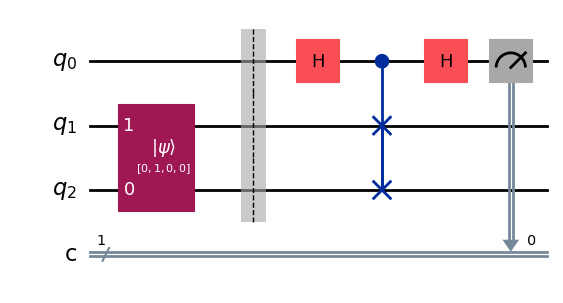

In [18]:
qc.draw(output='mpl', style='iqx')

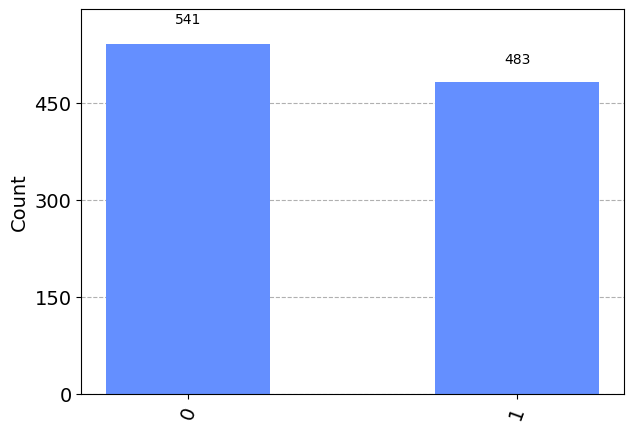

In [19]:
plot_histogram(counts)

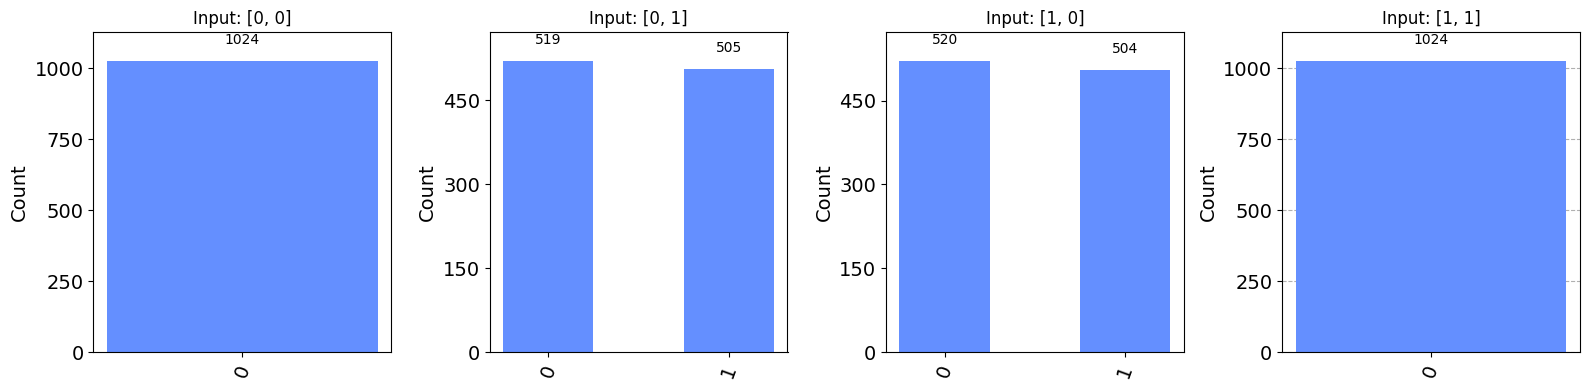

In [21]:
states = [
    [0,0],
    [0,1],
    [1,0],
    [1,1]
]

fig, ax = plt.subplots(1,4, figsize=(16,4))
for i, state in enumerate(states):
    _, counts = cswap_test(state)
    plot_histogram(counts, ax=ax[i])
    ax[i].set_title(f"Input: {state}")
plt.tight_layout()
plt.show()